# K Means Clustering

### Dataset: Mall Dataset
### Number of attributes: 5
### Number of instances: 200

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
ds = pd.read_csv("Mall_Customers.csv")


### Data Preprocessing

In [13]:
ds.isnull().values.any()

False

### Normalization of Data

In [14]:
ds['CustomerID']=ds['CustomerID']/200
ds['Age']=(ds['Age']-ds['Age'].mean())/(ds['Age'].std())
ds['AnnualIncome']=(ds['AnnualIncome']-ds['AnnualIncome'].mean())/(ds['AnnualIncome'].std())
ds['SpendingScore']=(ds['SpendingScore']-ds['SpendingScore'].mean())/(ds['SpendingScore'].std())
ds=ds.replace('M',0)
ds=ds.replace('F',1)

In [15]:
X = np.array([ds['CustomerID'],ds['Gender'],ds['Age'],ds['AnnualIncome'],ds['SpendingScore']])

In [16]:
print(np.shape(X))
X = X.T
print(np.shape(X))
X=np.matrix(X)

(5, 200)
(200, 5)


### Function to calculate Euclidean Distance
Euclidean distance is used as a distance measure for the algorithm.

In [17]:
def computeDistance(x1,x2):
    d=np.sqrt(np.sum(np.power((x1-x2),2)))
    return d

### Random Initialization of centroids among the samples

In [19]:
def randomInit(X,no_of_clusters,no_of_samples,nof):
    centroids = []
    for i in range(no_of_clusters):
        temp = np.random.randint(0,no_of_samples)
        tempcents = []
        for j in range(nof):
            tempcents.append(X[temp,j])
        centroids.append(tempcents)
    centroids = np.matrix(centroids)
    return centroids

### Label / Assign the given data sample to the nearest centroid
Every data sample point is assigned to the nearest centroid determined by Euclidean Distance.

In [20]:
def labelling(x,centroids):
    distances = {}
    for i in range(len(centroids)):
        distances[computeDistance(x,centroids[i,:])] = i
    return distances[min(distances.keys())]

### Assign centroids for all data samples

In [21]:
def clusterAssignment(X,clusters,centroids):
    for i in range(len(X)):
        clusters[i] = labelling(X[i,:],centroids)
    return clusters

The mean of all the points(data samples) assigned to a particular centroid is computed.

The mean is then set as the new Centroid.

In [22]:
def updateCentroid(X,clusters,centroids,nof):
    sums = np.matrix(np.zeros(centroids.shape))
    count = np.zeros(len(centroids),dtype=int)
    newCentroids = np.matrix(np.zeros(centroids.shape))
    for i in range(len(X)):
        for j in range(nof):
            sums[clusters[i],j]+=X[i,j]
        count[clusters[i]]+=1
    for i in range(len(centroids)):
        newCentroids[i,:] = sums[i,:]/count[i]
    return newCentroids

 _K-Means_ Algorithm<br>
 The following steps are followed until convergence or for specified number of iterations.<br>
1. Cluster Assignment : Assign every point to its nearest centroid (_clusterAssignment_ function).
2. Update the Centroids : Compute the mean of each cluster and update it as the new centroid. (_updateCentroid_ function).    

In [23]:
def kmeans_call(X,clusters,centroids,iterations,nof): 
    for i in range(iterations):
        clusters = clusterAssignment(X,clusters,centroids)
        new_centroids = updateCentroid(X,clusters,centroids,nof)     
        centroids = new_centroids
        
    return centroids,clusters    

In [24]:
number_of_samples = 200
number_of_iterations = 100
number_of_features = 5

### Calculating optimum value of K
Plot the graphs for different values of K to obtain the optimum value of K using the elbow curve

[453.23687512 356.26294    258.10753626 220.07083525]


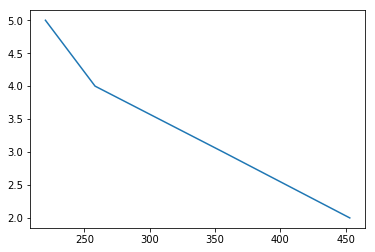

In [25]:
plt.figure()
k=[2,3,4,5]

s=np.zeros(len(k))
for j in range(len(k)):
    centroids = randomInit(X,k[j],number_of_samples,number_of_features)
    clusters = np.zeros(len(X),dtype=int)
    (finalCentroids,finalClusters) = kmeans_call(X,clusters,centroids,number_of_iterations,number_of_features)
    for i in range(len(X)):
        s[j]+=np.sum(np.power(X[i,:]-finalCentroids[finalClusters[i],:],2))
print(s)    
plt.plot(s,k)
plt.show()

In [26]:
number_of_clusters = 4

In [27]:
centroids = randomInit(X,number_of_clusters,number_of_samples,number_of_features) 
clusters = np.zeros(len(X),dtype=int)

In [28]:
(finalCentroids,finalClusters) = kmeans_call(X,clusters,centroids,number_of_iterations,number_of_features)

In [29]:
print(finalCentroids,finalClusters, len(finalCentroids),len(finalClusters))

[[ 0.81        0.53846154 -0.44081102  0.98910098  1.23640011]
 [ 0.5885      0.5375      0.80803881  0.3113492  -0.51551838]
 [ 0.12452381  0.61904762  0.59366116 -1.26688136 -1.20266876]
 [ 0.32025     0.58333333 -0.99863932 -0.61463943  0.30463183]] [3 3 2 3 3 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 1 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 1 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 1 3 3 3 1 1 1 1 3 1 1 0 3 0 1 0 1 0 1 0 3 0 3 0 1 0 3 0 1 0 3 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0] 4 200
